In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_csv('./train.csv')
#pre-processing
education_mapping = {
    'Others': 0,
    'Literate': 1,
    '5th Pass': 2,
    '8th Pass': 3,
    '10th Pass': 4,
    '12th Pass': 5,
    'Graduate': 6,
    'Graduate Professional': 7,
    'Post Graduate': 8,
    'Doctorate': 9
}
inverse_education_map = {v: k for k, v in education_mapping.items()}
df['Education'] = df['Education'].map(education_mapping)
def check_prefix_doc(name):
    return 1 if name.startswith('Dr.') else 0
def check_prefix_adv(name):
    return 1 if name.startswith('Adv.') else 0
df['IsDoctor']=0
df['IsDoctor'] = df['Candidate'].apply(check_prefix_doc)
df['IsAdv']=0
df['IsAdv'] = df['Candidate'].apply(check_prefix_adv)
regex_patterns = {
    r'(\d+)\sCrore\+': r'\g<1>00000',  # Replace Cr+ with 00000
    r'(\d+)\sLac\+': r'\g<1>000',  # Replace Lac+ with 000
    r'(\d+)\sLacs\+': r'\g<1>000',  # Replace Lac+ with 000
    r'(\d+)\sThou\+': r'\g<1>0' ,     # Replace Thou+ with 0
    r'(\d+)\sHund\+': r'\g<1>'       #Replace Hund+ with 
}
# Apply regex replacements and convert to integers
df['Total Assets'] = df['Total Assets'].replace(regex_patterns, regex=True).astype(int)
df['Liabilities'] = df['Liabilities'].replace(regex_patterns, regex=True).astype(int)
df['Wealth']=df['Total Assets']-df['Liabilities']

In [91]:
# Calculate the 75th percentile of the 'Criminal Case' column
crim_75th_percentile = df['Criminal Case'].quantile(0.75)
print("75th Percentile of Criminal Case column:", crim_75th_percentile)
# Calculate the 75th percentile of the 'Wealth' column
wealth_75th_percentile = df['Wealth'].quantile(0.75)
print("75th Percentile of Wealth column:", wealth_75th_percentile)

75th Percentile of Criminal Case column: 2.0
75th Percentile of Wealth column: 700000.0


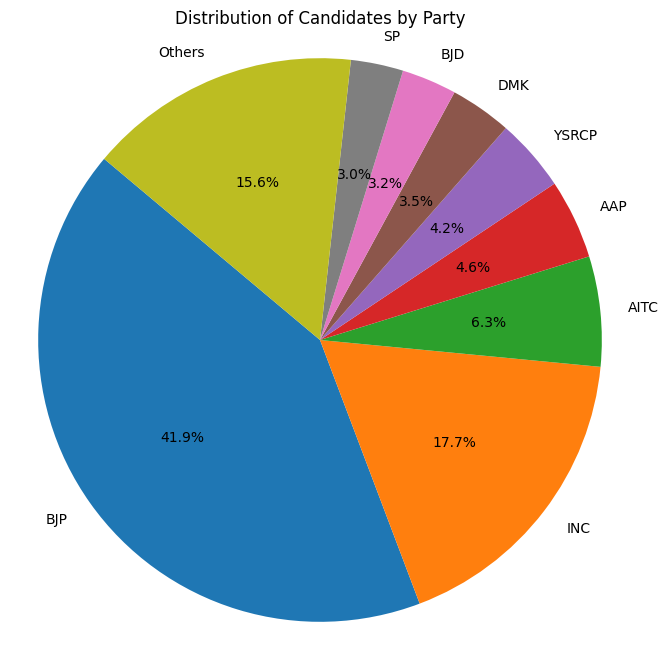

<Figure size 640x480 with 0 Axes>

In [92]:
# Count the number of Candidate from each party
party_distribution = df['Party'].value_counts()
# Extract party names and candidate counts
parties = party_distribution.index.tolist()
candidate_counts = party_distribution.values.tolist()
#creating a dummy dataframe
dummy = pd.DataFrame({'Party': parties, 'count': candidate_counts})
#print(dummy)

# Calculate total count and percentages
total_count = sum(candidate_counts)
dummy['Percentage'] = dummy['count'] / total_count * 100

# Identify parties with percentages less than 3% and aggregate them into "Other"
threshold = 3
other_count = dummy[dummy['Percentage'] < threshold]['count'].sum()
df_filtered = dummy[dummy['Percentage'] >= threshold]
big_parties=df_filtered['Party']
df_others = pd.DataFrame({'Party': ['Others'], 'count': [other_count], 'Percentage': [100 - df_filtered['Percentage'].sum()]})
df_combined = pd.concat([df_filtered, df_others])

# Prepare data for the pie chart
parties = df_combined['Party'].tolist()
counts = df_combined['count'].tolist()
#print(df_combined)
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=parties, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Candidates by Party')
plt.axis('equal')

# Show the plot
plt.show()

#Save the plot
plt.savefig('pie_chart_1.png')

556


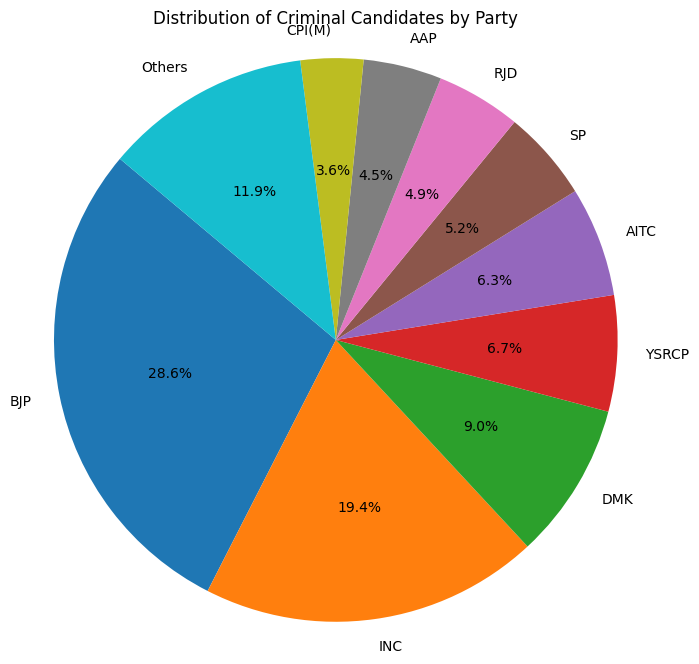

<Figure size 640x480 with 0 Axes>

In [93]:
df_fil=df[df['Criminal Case']>=2]
# Count the number of Candidate from each party
party_distribution = df_fil['Party'].value_counts()
# Extract party names and candidate counts
parties = party_distribution.index.tolist()
candidate_counts = party_distribution.values.tolist()
#creating a dummy dataframe
dummy = pd.DataFrame({'Party': parties, 'count': candidate_counts})
#print(dummy)

# Calculate total count and percentages
total_count = sum(candidate_counts)
print(total_count)
dummy['Percentage'] = dummy['count'] / total_count * 100

# Identify parties with percentages less than 3.5% and aggregate them into "Other"
threshold = 3.5
other_count = dummy[dummy['Percentage'] < threshold]['count'].sum()
df_filtered = dummy[dummy['Percentage'] >= threshold]
df_others = pd.DataFrame({'Party': ['Others'], 'count': [other_count], 'Percentage': [100 - df_filtered['Percentage'].sum()]})
df_combined = pd.concat([df_filtered, df_others])

# Prepare data for the pie chart
parties = df_combined['Party'].tolist()
counts = df_combined['count'].tolist()
#print(dummy)
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=parties, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Criminal Candidates by Party')
plt.axis('equal')

# Show the plot
plt.show()

#Save the plot
plt.savefig('pie_chart_2.png')

519


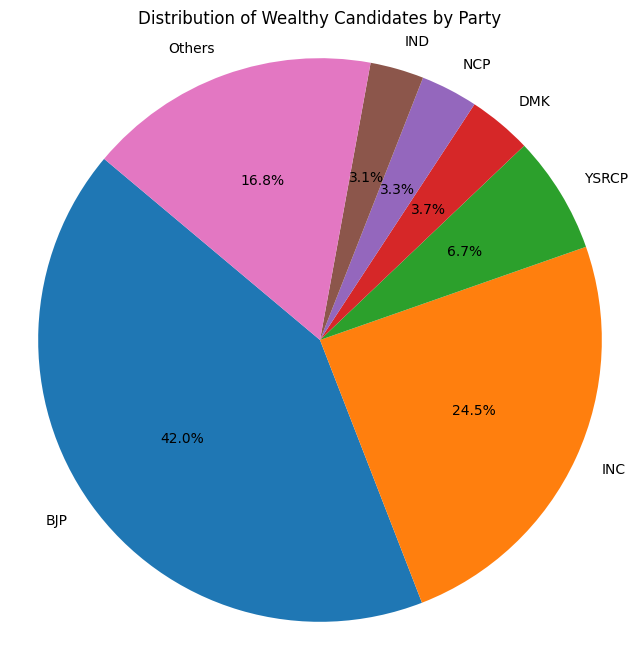

<Figure size 640x480 with 0 Axes>

In [94]:
df_fil=df[df['Wealth']>=700000]
# Count the number of Candidate from each party
party_distribution = df_fil['Party'].value_counts()
# Extract party names and candidate counts
parties = party_distribution.index.tolist()
candidate_counts = party_distribution.values.tolist()
#creating a dummy dataframe
dummy = pd.DataFrame({'Party': parties, 'count': candidate_counts})
#print(dummy)

# Calculate total count and percentages
total_count = sum(candidate_counts)
print(total_count)
dummy['Percentage'] = dummy['count'] / total_count * 100

# Identify parties with percentages less than 3.5% and aggregate them into "Other"
threshold = 3
other_count = dummy[dummy['Percentage'] < threshold]['count'].sum()
df_filtered = dummy[dummy['Percentage'] >= threshold]
df_others = pd.DataFrame({'Party': ['Others'], 'count': [other_count], 'Percentage': [100 - df_filtered['Percentage'].sum()]})
df_combined = pd.concat([df_filtered, df_others])

# Prepare data for the pie chart
parties = df_combined['Party'].tolist()
counts = df_combined['count'].tolist()
#print(dummy)
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=parties, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wealthy Candidates by Party')
plt.axis('equal')

# Show the plot
plt.show()

#Save the plot
plt.savefig('pie_chart_3.png')

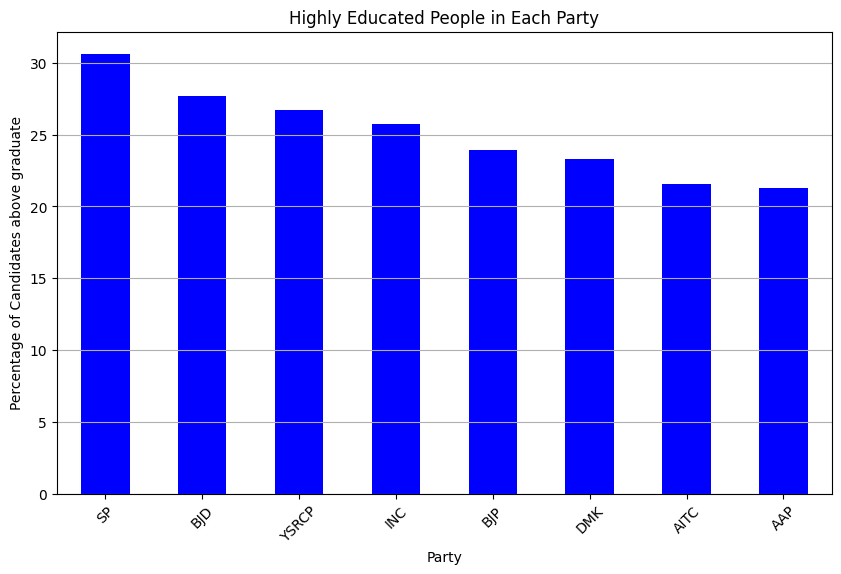

<Figure size 640x480 with 0 Axes>

In [95]:
big_prty=big_parties.tolist()
df_fil=df[df['Party'].isin(big_prty)]
# Calculate the percentage of candidates with education >= 4 for each party
above_5_count = df_fil[df_fil['Education'] > 7].groupby('Party').size()
total_count = df_fil.groupby('Party').size()
percentage_above_5 = (above_5_count / total_count) * 100

# Sort parties by percentage in descending order
percentage_above_5_sorted = percentage_above_5.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
percentage_above_5_sorted.plot(kind='bar', color='blue')
plt.xlabel('Party')
plt.ylabel('Percentage of Candidates above graduate')
plt.title('Highly Educated People in Each Party')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.grid(axis='y')
plt.show()
plt.savefig('bar_graph_1.png')

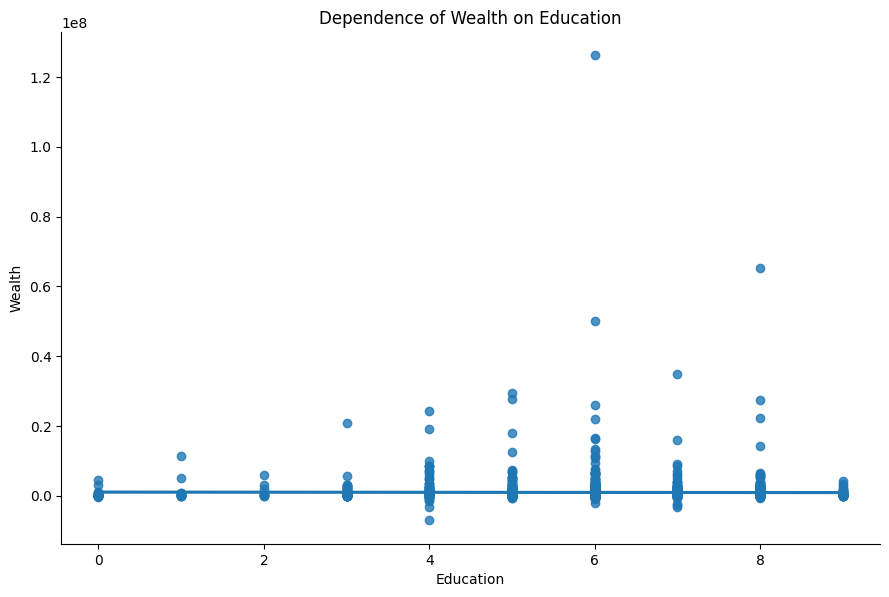

In [96]:
sns.lmplot(x='Education', y='Wealth', data=df, height=6, aspect=1.5)
plt.title('Dependence of Wealth on Education')
plt.show()
#plt.savefig('linreg_1.png')